Lending Loan Club Data Analysis -Milestone Report 

In [82]:
import pandas as pd 
df = pd.read_csv('loan.csv',low_memory=False)

In [83]:
#Dropping columns where there is more than 25% of null values
thresh = len(df) * .25
df.dropna(thresh = thresh, axis = 1, inplace = True)


In [84]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,171.62,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,119.66,NaN,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,649.91,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,357.48,NaN,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,67.79,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN


In [85]:
df_new = df.loc[:,['int_rate',
       'loan_status']]

In [86]:
df_new.head()

,int_rate,loan_status
0,10.65,Fully Paid
1,15.27,Charged Off
2,15.96,Fully Paid
3,13.49,Fully Paid
4,12.69,Current


In [87]:
#As we could see that there are no missing values in the data frame
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 2 columns):
int_rate       887379 non-null float64
loan_status    887379 non-null object
dtypes: float64(1), object(1)
memory usage: 13.5+ MB


In [88]:
df_new['loan_status'] = df_new['loan_status'].astype('category')

In [89]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 2 columns):
int_rate       887379 non-null float64
loan_status    887379 non-null category
dtypes: category(1), float64(1)
memory usage: 7.6 MB


In [90]:
df_new['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [102]:
df_new = df_new.loc[df_new['loan_status'].isin(['Current','Fully Paid'])]
df_new.dropna(axis = 0, inplace = True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 809502 entries, 0 to 887378
Data columns (total 2 columns):
int_rate       809502 non-null float64
loan_status    809502 non-null category
dtypes: category(1), float64(1)
memory usage: 13.1 MB


In [97]:
df_fully_paid = df_new.loc[df_new['loan_status'].isin(['Fully Paid'])]
df_current = df_new.loc[df_new['loan_status'].isin(['Current'])]

Null Hypothesis : The mean interest rate with a default loan status is the same as that of the non default loan status

Alternate Hypothesis : The mean interest rate with a default loan status is not the same as that of the non default loan status

In [104]:
df_fully_paid.int_rate.mean()

13.274243969148214

In [105]:
df_current.int_rate.mean()

12.945768596169092

In [106]:
from scipy.stats import ttest_ind

In [34]:
df_new = df_new.loc[df_new.loan_status!='Current']
df_new = df_new.loc[df_new.loan_status!='Late (31-120 days)']
df_new = df_new.loc[df_new.loan_status!='Late (16-30 days)']
df_new = df_new.loc[df_new.loan_status!='In Grace Period']
df_new = df_new.loc[df_new.loan_status!='Default']

dictionary = {'Does not meet the credit policy. Status:Fully Paid':'Fully Paid',
             'Does not meet the credit policy. Status:Charged Off':'Charged Off'}

df_new['loan_status'].replace(dictionary,inplace=True)


In [35]:
df_new['loan_status'].value_counts()

Fully Paid     207723
Charged Off     45248
Issued           8460
Non Default      1988
                  761
Name: loan_status, dtype: int64

Lets try to divide our data set into two types :Default and Non Default 

In [8]:
default = ['Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Issued']
non_default =['Fully Paid','Does not meet the credit policy. Status:Fully Paid','Does not meet the credit policy. Status:Charged Off']

In [ ]:
for i in df_new['loan_status'] :
    if i in non_default :
        df_new['loan_status'] == 0
    else :
        df_new['loan_status'] == 1

In [ ]:
df_new.head()

Null Hypothesis : The mean interest rate with a default loan status is the same as that of the non default loan status

Alternate Hypothesis : The mean interest rate with a default loan status is not the same as that of the non default loan status

In [18]:
df['loan_status'].unique()
default = ['Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
           'Does not meet the credit policy. Status:Charged Off', 'Issued']
non_default =['Fully Paid','Does not meet the credit policy. Status:Fully Paid',]

In [ ]:
df['loan_status_res'] = df['policy_code']
for i in df['loan_status'] :
    if i in non_default :
        df['loan_status_res'] == 0
    else :
        df['loan_status_res'] == 1

In [14]:
import numpy as np
from scipy.stats import t
from numpy.random import seed
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Frequency of Loan amount invested')

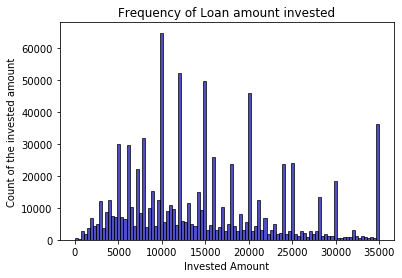

In [23]:
loan_amount_mean = int(np.mean(df['funded_amnt_inv']))
loan_amount_std = int(np.std(df['funded_amnt_inv']))
plt.hist(df.funded_amnt_inv,bins=100,histtype='bar',color='#0504aa',alpha=0.7, ec = 'black')
plt.xlabel('Invested Amount')
plt.ylabel('Count of the invested amount')
plt.title('Frequency of Loan amount invested')

The mean of the loan amount invested is 14702 dollars and the std deviation is 8442 dollars 

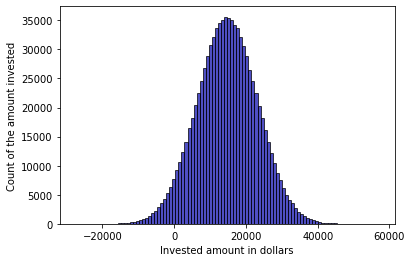

In [27]:
df_len = len(df)
from scipy.stats import norm 
changes = norm.rvs(loan_amount_mean,loan_amount_std,df_len)
_ = plt.hist(changes, bins=100,histtype='bar',color='#0504aa',alpha=0.7, ec = 'black')
_ = plt.xlabel('Invested amount in dollars')
_ = plt.ylabel('Count of the amount invested')
plt.show()

Number of loan distributed by employeer years 
